In [18]:
import pandas as pd
import seaborn as sns
import numpy as np

In [19]:
data = pd.read_csv('../data/processed/data.csv')

In [20]:
data.head()

,session_id,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,...,idle_active_ratio,label,session_duration,request_count,time_afternoon,time_evening,time_morning,time_night,time_wee_hours,new_label
0,03jt2p4bdru20sjb9me2gco6j4,3.121928,10,1606000878926,6.226647e-12,1.292750,3.265045,10044.058824,-97.987654,4076.554706,...,4.248230e+07,human,882.0,897,0,0,897,0,0,human
1,071tbv7fsev5d64kb0f9jieor6,3.221097,19,677103,2.806072e-05,0.509696,0.965173,1951.275000,-3.079521,1211.355072,...,2.274826e+00,advanced_bot,680.0,401,0,401,0,0,0,bot
2,094i85crhkpkhqpi3rl4athrn4,2.895424,17,1606000279969,1.058530e-11,0.517826,0.218432,966.923077,-94.009643,2813.920800,...,7.828571e+06,advanced_bot,282.0,316,0,0,0,316,0,bot
3,0ht0u328t4mkgi01sp7mm07e01,2.446439,10,141246,7.079847e-05,0.232604,3.927866,866.327044,-2.978588,616.098440,...,1.028202e+00,moderate_bot,142.0,109,109,0,0,0,0,bot
4,0i5kvpslrq3vb6u8ff2kuejv0v,3.452820,16,460995,3.470753e-05,0.508165,0.895245,2000.883117,-0.205002,1173.942929,...,2.184613e+00,advanced_bot,465.0,283,0,283,0,0,0,bot


<Axes: >

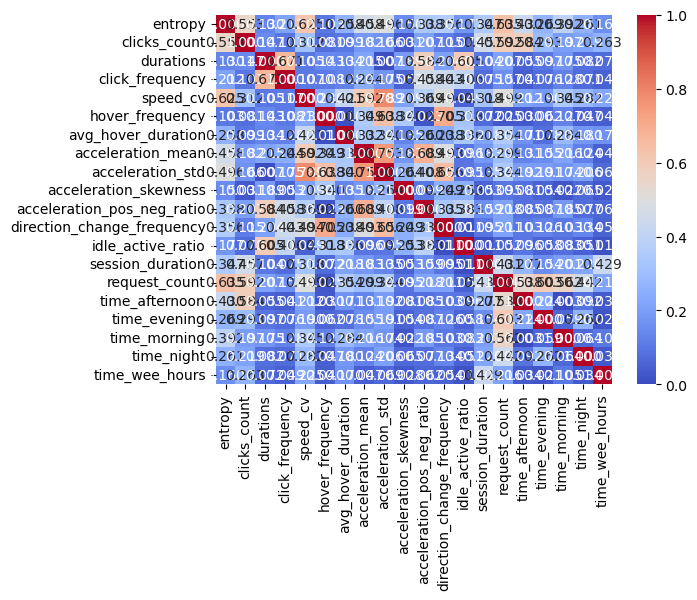

In [21]:
corr_matrix = data[[column for column in list(data.columns) if column != 'label' and column!= 'session_id' and column != 'new_label']].corr().abs()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', vmin=0, vmax=1)

In [22]:
corr_matrix

,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,acceleration_skewness,acceleration_pos_neg_ratio,direction_change_frequency,idle_active_ratio,session_duration,request_count,time_afternoon,time_evening,time_morning,time_night,time_wee_hours
entropy,1.000000,0.553161,0.129762,0.212183,0.625004,0.103139,0.258445,0.458372,0.496484,0.149804,0.337728,0.356365,0.176817,0.346538,0.634737,0.429995,0.269294,0.392355,0.260659,0.159796
clicks_count,0.553161,1.000000,0.147210,0.101401,0.311773,0.080828,0.099247,0.182072,0.166012,0.031418,0.206927,0.114923,0.077863,0.456790,0.591933,0.584207,0.292650,0.196768,0.218594,0.262963
durations,0.129762,0.147210,1.000000,0.671111,0.104851,0.143340,0.134231,0.214923,0.006855,0.188808,0.583994,0.203648,0.604754,0.103548,0.207314,0.055143,0.096997,0.175235,0.081769,0.072159
click_frequency,0.212183,0.101401,0.671111,1.000000,0.107393,0.107748,0.127877,0.244095,0.175008,0.052797,0.457807,0.442912,0.405793,0.075188,0.157298,0.040570,0.076155,0.128177,0.071372,0.048963
speed_cv,0.625004,0.311773,0.104851,0.107393,1.000000,0.230255,0.420772,0.592155,0.788609,0.209486,0.369005,0.494257,0.048964,0.318105,0.498690,0.211910,0.190493,0.344839,0.282145,0.224901
hover_frequency,0.103139,0.080828,0.143340,0.107748,0.230255,1.000000,0.009874,0.348675,0.638311,0.339996,0.022976,0.705047,0.317903,0.072353,0.025094,0.029928,0.061994,0.126891,0.046796,0.039752
avg_hover_duration,0.258445,0.099247,0.134231,0.127877,0.420772,0.009874,1.000000,0.332098,0.340499,0.134658,0.259691,0.237889,0.336230,0.218316,0.353756,0.171190,0.078270,0.283649,0.180395,0.169969
acceleration_mean,0.458372,0.182072,0.214923,0.244095,0.592155,0.348675,0.332098,1.000000,0.752590,0.182515,0.688877,0.492715,0.095696,0.182625,0.298915,0.131208,0.154751,0.216374,0.124203,0.046546
acceleration_std,0.496484,0.166012,0.006855,0.175008,0.788609,0.638311,0.340499,0.752590,1.000000,0.263776,0.407797,0.655525,0.095060,0.135318,0.344380,0.192357,0.191408,0.174497,0.205752,0.068617
acceleration_skewness,0.149804,0.031418,0.188808,0.052797,0.209486,0.339996,0.134658,0.182515,0.263776,1.000000,0.098739,0.248708,0.252580,0.053316,0.094712,0.080786,0.053923,0.021675,0.065182,0.027677


In [23]:
import pandas as pd

# Compute absolute correlation matrix excluding 'label' and 'session_id'
corr_matrix = data[[col for col in data.columns if col not in ['label', 'session_id', 'new_label']]].corr().abs()

# Extract upper triangle of the correlation matrix without the diagonal
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find feature pairs with correlation greater than 0.4
high_corr = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > 0.4
]

# Optional: remove duplicates like (A, B) and (B, A)
high_corr_unique = [
    (col1, col2, corr)
    for (col1, col2, corr) in high_corr
    if corr_matrix.columns.get_loc(col1) < corr_matrix.columns.get_loc(col2)
]

# View results
for var1, var2, corr_val in high_corr_unique:
    print(f"{var1} - {var2}: {corr_val:.2f}")


entropy - clicks_count: 0.55
entropy - speed_cv: 0.63
entropy - acceleration_mean: 0.46
entropy - acceleration_std: 0.50
entropy - request_count: 0.63
entropy - time_afternoon: 0.43
clicks_count - session_duration: 0.46
clicks_count - request_count: 0.59
clicks_count - time_afternoon: 0.58
durations - click_frequency: 0.67
durations - acceleration_pos_neg_ratio: 0.58
durations - idle_active_ratio: 0.60
click_frequency - acceleration_pos_neg_ratio: 0.46
click_frequency - direction_change_frequency: 0.44
click_frequency - idle_active_ratio: 0.41
speed_cv - avg_hover_duration: 0.42
speed_cv - acceleration_mean: 0.59
speed_cv - acceleration_std: 0.79
speed_cv - direction_change_frequency: 0.49
speed_cv - request_count: 0.50
hover_frequency - acceleration_std: 0.64
hover_frequency - direction_change_frequency: 0.71
acceleration_mean - acceleration_std: 0.75
acceleration_mean - acceleration_pos_neg_ratio: 0.69
acceleration_mean - direction_change_frequency: 0.49
acceleration_std - accelerati

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_cols = [col for col in data.columns if col not in ['label', 'session_id', 'new_label']]
X = data[feature_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data["VIF"] = vif_data["VIF"].round(4)
print(vif_data)


                       feature                   VIF
0                      entropy                2.9835
1                 clicks_count                3.1325
2                    durations               11.7980
3              click_frequency                2.8405
4                     speed_cv                9.4240
5              hover_frequency               18.1384
6           avg_hover_duration                2.4332
7            acceleration_mean                3.2226
8             acceleration_std               12.8115
9        acceleration_skewness                1.3968
10  acceleration_pos_neg_ratio                0.1303
11  direction_change_frequency                6.4897
12           idle_active_ratio                4.7186
13            session_duration                1.6624
14               request_count 3002399751580330.5000
15              time_afternoon                   inf
16                time_evening 1501199875790165.2500
17                time_morning 900719925474099

/Users/linyan/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#pd.set_option('display.float_format', '{:.4f}'.format)